In [21]:
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import plot_model
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

In [22]:
data = load_iris()
y = data.target
x = data.data
y = pd.Categorical(y)
y = pd.get_dummies(y).values
class_num = y.shape[1]

In [23]:
model = Sequential()
model.add(Dense(64, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(class_num, activation='softmax'))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                320       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 8,835
Trainable params: 8,835
Non-trainable params: 0
_________________________________________________________________


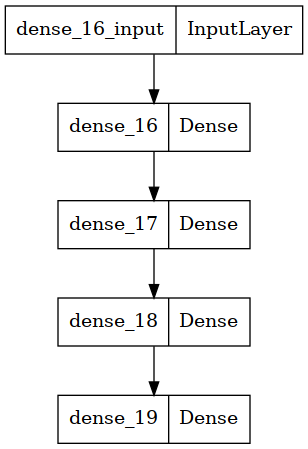

In [24]:
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics='accuracy')
model.summary()
plot_model(model, to_file="my_model.png")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
history = model.fit(x_train, y_train, batch_size=15, epochs=100, validation_data=(x_test, y_test), verbose=2)

In [ ]:
historia = model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
epochs = np.arange(0, 100)
ax[0].plot(epochs, floss_train, label='floss_train')
ax[0].plot(epochs, floss_test, label='floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label='acc_train')
ax[1].plot(epochs, acc_test, label='acc_test')
ax[1].legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(y_pred)
print(y_test)
print(y_pred == y_test)

In [26]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
weights = model.get_weights()
accs = []
for train_index, val_index in KFold(5).split(x_train):
    x_train_cv = x_train[train_index, :]
    x_val_cv = x_train[val_index, :]
    y_train_cv = y_train[train_index, :]
    y_val_cv = y_train[val_index, :]

    x_train_cv = scaler.fit_transform(x_train_cv)
    x_val_cv = scaler.transform(x_val_cv)

    model.set_weights(weights)
    model.fit(x_train_cv, y_train_cv, batch_size=15, epochs=100, validation_data=(x_val_cv, y_val_cv), verbose=1)

    y_pred_cv = model.predict(x_val_cv).argmax(axis=1)
    y_val_cv = y_val_cv.argmax(axis=1)
    accs.append(accuracy_score(y_val_cv, y_pred_cv))

print(accs)
print(np.mean(accs))

Epoch 1/100
7/7 [==============================] - 0s 53ms/step - loss: 0.1987 - accuracy: 0.9271 - val_loss: 0.2953 - val_accuracy: 0.8333
Epoch 2/100
7/7 [==============================] - 0s 26ms/step - loss: 0.1941 - accuracy: 0.9271 - val_loss: 0.2917 - val_accuracy: 0.8750
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 0.1878 - accuracy: 0.9375 - val_loss: 0.2901 - val_accuracy: 0.8750
Epoch 4/100
7/7 [==============================] - 0s 33ms/step - loss: 0.1851 - accuracy: 0.9375 - val_loss: 0.2893 - val_accuracy: 0.8750
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 0.1824 - accuracy: 0.9375 - val_loss: 0.2888 - val_accuracy: 0.8750
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 0.1798 - accuracy: 0.9375 - val_loss: 0.2885 - val_accuracy: 0.8750
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1777 - accuracy: 0.9583 - val_loss: 0.2884 - val_accuracy: 0.9167
Epoch 8/100
7/7 [===

7/7 [==============================] - 0s 18ms/step - loss: 0.1012 - accuracy: 0.9583 - val_loss: 0.2748 - val_accuracy: 0.8750
Epoch 60/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1002 - accuracy: 0.9583 - val_loss: 0.2744 - val_accuracy: 0.8750
Epoch 61/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0992 - accuracy: 0.9583 - val_loss: 0.2744 - val_accuracy: 0.8750
Epoch 62/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0983 - accuracy: 0.9583 - val_loss: 0.2742 - val_accuracy: 0.8750
Epoch 63/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0974 - accuracy: 0.9583 - val_loss: 0.2740 - val_accuracy: 0.8750
Epoch 64/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0966 - accuracy: 0.9583 - val_loss: 0.2736 - val_accuracy: 0.8750
Epoch 65/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0958 - accuracy: 0.9583 - val_loss: 0.2736 - val_accuracy: 0.8750
Epoch 66/100
7/7 [========

Epoch 17/100
7/7 [==============================] - 0s 30ms/step - loss: 0.1840 - accuracy: 0.9375 - val_loss: 0.1879 - val_accuracy: 0.9167
Epoch 18/100
7/7 [==============================] - 0s 28ms/step - loss: 0.1827 - accuracy: 0.9375 - val_loss: 0.1860 - val_accuracy: 0.9167
Epoch 19/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1803 - accuracy: 0.9271 - val_loss: 0.1858 - val_accuracy: 0.9167
Epoch 20/100
7/7 [==============================] - 0s 24ms/step - loss: 0.1789 - accuracy: 0.9375 - val_loss: 0.1859 - val_accuracy: 0.9167
Epoch 21/100
7/7 [==============================] - 0s 21ms/step - loss: 0.1766 - accuracy: 0.9271 - val_loss: 0.1845 - val_accuracy: 0.9167
Epoch 22/100
7/7 [==============================] - 0s 36ms/step - loss: 0.1764 - accuracy: 0.9271 - val_loss: 0.1833 - val_accuracy: 0.9167
Epoch 23/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1755 - accuracy: 0.9271 - val_loss: 0.1827 - val_accuracy: 0.9167
Epoch 24/100


7/7 [==============================] - 0s 50ms/step - loss: 0.1229 - accuracy: 0.9479 - val_loss: 0.1538 - val_accuracy: 0.9583
Epoch 76/100
7/7 [==============================] - 0s 42ms/step - loss: 0.1221 - accuracy: 0.9479 - val_loss: 0.1534 - val_accuracy: 0.9583
Epoch 77/100
7/7 [==============================] - 0s 28ms/step - loss: 0.1216 - accuracy: 0.9479 - val_loss: 0.1531 - val_accuracy: 0.9583
Epoch 78/100
7/7 [==============================] - 0s 42ms/step - loss: 0.1211 - accuracy: 0.9479 - val_loss: 0.1522 - val_accuracy: 0.9583
Epoch 79/100
7/7 [==============================] - 0s 28ms/step - loss: 0.1205 - accuracy: 0.9479 - val_loss: 0.1516 - val_accuracy: 0.9583
Epoch 80/100
7/7 [==============================] - 0s 37ms/step - loss: 0.1195 - accuracy: 0.9479 - val_loss: 0.1511 - val_accuracy: 0.9583
Epoch 81/100
7/7 [==============================] - 0s 28ms/step - loss: 0.1186 - accuracy: 0.9479 - val_loss: 0.1508 - val_accuracy: 0.9583
Epoch 82/100
7/7 [========

Epoch 33/100
7/7 [==============================] - 0s 21ms/step - loss: 0.1604 - accuracy: 0.9375 - val_loss: 0.2423 - val_accuracy: 0.9583
Epoch 34/100
7/7 [==============================] - 0s 35ms/step - loss: 0.1590 - accuracy: 0.9375 - val_loss: 0.2436 - val_accuracy: 0.9583
Epoch 35/100
7/7 [==============================] - 0s 24ms/step - loss: 0.1583 - accuracy: 0.9479 - val_loss: 0.2448 - val_accuracy: 0.9583
Epoch 36/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1570 - accuracy: 0.9479 - val_loss: 0.2439 - val_accuracy: 0.9583
Epoch 37/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1567 - accuracy: 0.9479 - val_loss: 0.2459 - val_accuracy: 0.9583
Epoch 38/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1552 - accuracy: 0.9479 - val_loss: 0.2467 - val_accuracy: 0.9583
Epoch 39/100
7/7 [==============================] - 0s 22ms/step - loss: 0.1539 - accuracy: 0.9583 - val_loss: 0.2458 - val_accuracy: 0.9583
Epoch 40/100


7/7 [==============================] - 0s 21ms/step - loss: 0.1158 - accuracy: 0.9583 - val_loss: 0.2545 - val_accuracy: 0.9583
Epoch 92/100
7/7 [==============================] - 0s 35ms/step - loss: 0.1156 - accuracy: 0.9583 - val_loss: 0.2499 - val_accuracy: 0.9583
Epoch 93/100
7/7 [==============================] - 0s 28ms/step - loss: 0.1138 - accuracy: 0.9583 - val_loss: 0.2511 - val_accuracy: 0.9583
Epoch 94/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1133 - accuracy: 0.9583 - val_loss: 0.2511 - val_accuracy: 0.9583
Epoch 95/100
7/7 [==============================] - 0s 28ms/step - loss: 0.1125 - accuracy: 0.9583 - val_loss: 0.2467 - val_accuracy: 0.9583
Epoch 96/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1127 - accuracy: 0.9583 - val_loss: 0.2452 - val_accuracy: 0.9583
Epoch 97/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1116 - accuracy: 0.9583 - val_loss: 0.2458 - val_accuracy: 0.9583
Epoch 98/100
7/7 [========

Epoch 49/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1542 - accuracy: 0.9583 - val_loss: 0.1507 - val_accuracy: 0.9583
Epoch 50/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1531 - accuracy: 0.9583 - val_loss: 0.1505 - val_accuracy: 0.9583
Epoch 51/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1518 - accuracy: 0.9583 - val_loss: 0.1500 - val_accuracy: 0.9583
Epoch 52/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1509 - accuracy: 0.9583 - val_loss: 0.1489 - val_accuracy: 0.9583
Epoch 53/100
7/7 [==============================] - 0s 33ms/step - loss: 0.1501 - accuracy: 0.9583 - val_loss: 0.1481 - val_accuracy: 0.9583
Epoch 54/100
7/7 [==============================] - 0s 22ms/step - loss: 0.1489 - accuracy: 0.9583 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 55/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1484 - accuracy: 0.9583 - val_loss: 0.1472 - val_accuracy: 0.9583
Epoch 56/100


Epoch 7/100
7/7 [==============================] - 0s 61ms/step - loss: 0.2233 - accuracy: 0.9062 - val_loss: 0.1258 - val_accuracy: 0.9583
Epoch 8/100
7/7 [==============================] - 0s 33ms/step - loss: 0.2211 - accuracy: 0.9167 - val_loss: 0.1245 - val_accuracy: 0.9583
Epoch 9/100
7/7 [==============================] - 0s 31ms/step - loss: 0.2191 - accuracy: 0.9167 - val_loss: 0.1228 - val_accuracy: 0.9583
Epoch 10/100
7/7 [==============================] - 0s 36ms/step - loss: 0.2178 - accuracy: 0.9167 - val_loss: 0.1212 - val_accuracy: 0.9583
Epoch 11/100
7/7 [==============================] - 0s 39ms/step - loss: 0.2156 - accuracy: 0.9271 - val_loss: 0.1198 - val_accuracy: 0.9583
Epoch 12/100
7/7 [==============================] - 0s 40ms/step - loss: 0.2143 - accuracy: 0.9271 - val_loss: 0.1193 - val_accuracy: 0.9583
Epoch 13/100
7/7 [==============================] - 0s 20ms/step - loss: 0.2127 - accuracy: 0.9375 - val_loss: 0.1181 - val_accuracy: 0.9583
Epoch 14/100
7/7

7/7 [==============================] - 0s 18ms/step - loss: 0.1501 - accuracy: 0.9375 - val_loss: 0.0819 - val_accuracy: 0.9583
Epoch 66/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1493 - accuracy: 0.9375 - val_loss: 0.0809 - val_accuracy: 0.9583
Epoch 67/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1483 - accuracy: 0.9375 - val_loss: 0.0799 - val_accuracy: 0.9583
Epoch 68/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1472 - accuracy: 0.9375 - val_loss: 0.0801 - val_accuracy: 0.9583
Epoch 69/100
7/7 [==============================] - 0s 41ms/step - loss: 0.1465 - accuracy: 0.9375 - val_loss: 0.0802 - val_accuracy: 0.9583
Epoch 70/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1459 - accuracy: 0.9375 - val_loss: 0.0788 - val_accuracy: 1.0000
Epoch 71/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1446 - accuracy: 0.9375 - val_loss: 0.0786 - val_accuracy: 1.0000
Epoch 72/100
7/7 [========